<img src="https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/seminars/images/msp_logo.png?25&raw=1" alt="vc_logo" width="400">

# Seminar 02: Spectrogram Basics - Support Materials

## Scipy Signal STFT

In [22]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/ZPTBCWS2iJc?rel=0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
from scipy import signal

In [ ]:
#@title
%%html
<iframe src="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html" height="500" width="900" title="Iframe Example"></iframe>


## SciPy Signal Chirp

In [24]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/fR6wEi-pqgM?rel=0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
from scipy.signal import chirp, stft
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [ ]:
fs = 48000
T = 1
t = np.arange(0, int(T*fs)) / fs
w = chirp(t, f0=20, f1=20000, t1=T, method='logarithmic')
ipd.Audio(w, rate=fs)

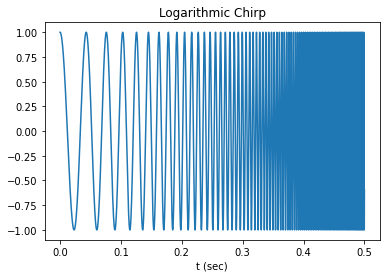

In [ ]:
plt.figure()
plt.plot(t[:24000],w[:24000])
plt.title("Logarithmic Chirp")
plt.xlabel('t (sec)')
plt.show()

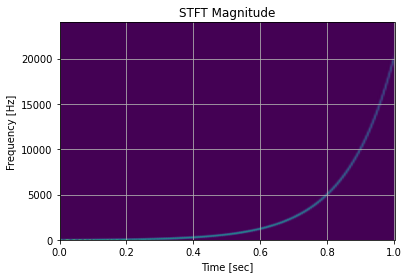

In [ ]:
f, t, Zxx = signal.stft(w, fs, nperseg=512)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.grid()
plt.show()

## SciPy Signal Spectrogram

In [25]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/N3a-jjq3FAY?rel=0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
from scipy.signal import spectrogram
def plot_spectrogram(title, w, fs):
    ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=512)
    plt.pcolormesh(tt, ff, Sxx, cmap='gray_r', shading='gouraud')
    plt.title(title)
    plt.xlabel('t (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.grid()

In [ ]:
#@title
%%html
<iframe src="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html" height="500" width="900" title="Iframe Example"></iframe>


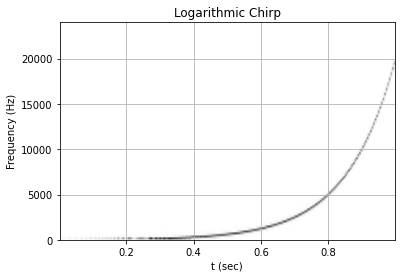

In [ ]:
plt.figure()
plot_spectrogram(f'Logarithmic Chirp', w, fs)
plt.show()

## Librosa STFT

In [26]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/7hEyXME4oMc?rel=0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
import librosa
import librosa.display

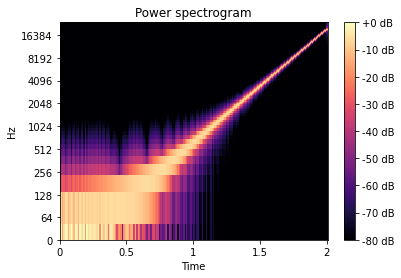

In [ ]:
S = np.abs(librosa.stft(w, n_fft=512, hop_length=256))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax, sr=fs)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

https://gist.github.com/bmcfee/746e572232be36f3bd462749fb1796da